# EDA for HIFLD data set on US hospitals

In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [7]:
# load data from data/hospital_level_info
hospitals = pd.read_csv("../data/hospital_level_info/02_hospital_info.csv")

In [4]:
hospitals.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STATE_ID', 'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF',
       'BEDS', 'TRAUMA', 'HELIPAD'],
      dtype='object')

Description of data:

- X: float, longitude (in decimal degrees)
- Y: float, latitude (in decimal degrees)
- OBJECTID: int, not quite sure what this is, but it is unique for each hospital
- ID: int, ID number
- NAME: str, hospital name
- ADDRESS: str, street address
- CITY: str, name of city where hospital is located
- STATE: str, state where hospital is located
- ZIP: int, 5 digit zipcode
- ZIP4: int, additional 4 digits for zipcode (not available for most hospitals)
- TELEPHONE: str, phone number (1084 not available)
- TYPE: str, type of hospital (most common type is generate acute care (4524))
- STATUS: str, closed or open (435 closed)
- POPULATION: int, ??? (I suspect this is number of staff, median = 65)
- COUNTY: str, name of county where hospital is located
- COUNTYFIPS: str, 6 digit county code from Federal Information Processing Standards
- COUNTRY: str, 3 letter country code (data also includes hospitals from Puerto Rico (PRI), Guam (GUM), etc.)
- LATITUDE: float, latitude (in decimal degrees)
- LONGITUDE: float, longitude (in decimal degrees)
- NAICS_CODE: int, North American Industry Classification code for establishment type, 622110 is for hospital
- NAICS_DESC: str, description of hospital type (general vs psychiatric, etc.)
- SOURCE: str, webpage URL containing ino about hospital (state government webpages)
- SOURCEDATE: str, date on which data was scalped (I think)
- VAL_METHOD: str, ??? (two levels: IMAGERY or IMAGERY/OTHER)
- VAL_DATE: str, some date
- WEBSITE: str, hospital website URL
- STATE_ID: str, ID from state? not quite sure what this is (most are not available)
- ALT_NAME: alternative name for hospital? (most not available (6677), also seems to have some miscoding)
- ST_FIPS: int, 2 digit code for ???
- OWNER: str, ownership type of hospital (government, proprietary, non-profit, etc.)
- TTL_STAFF: int, all missing
- BEDS: int, number of hospital beds
- TRAUMA: str, trauma center level
- HELIPAD: str, whether hospital has a helipad

In [29]:
hospitals.ID

0         5793230
1        53391362
2        11190023
3        17090028
4        23691706
5        25190712
6        30791016
7        30891754
8        47090505
9         9092879
10       30696101
11       38593901
12        1890621
13       15992866
14       16192680
15       23792621
16       24392683
17       22093277
18       21031503
19        1931537
20        5870563
21        2070364
22        4671360
23       15671222
24       16971241
25       15371373
26        5371418
27        4270739
28       22830662
29        2054311
          ...    
7551      6807055
7552      3607009
7553      5807103
7554      7407107
7555     12407302
7556      4251101
7557     10107065
7558      9208079
7559     10508861
7560       608628
7561      3808540
7562     11208690
7563     11408540
7564     13508618
7565      4707960
7566      4807801
7567      5507801
7568      4608755
7569    108207009
7570    108408096
7571     13143138
7572    108608701
7573    109008068
7574    109207207
7575    10

In [27]:
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 34 columns):
X             7581 non-null float64
Y             7581 non-null float64
OBJECTID      7581 non-null int64
ID            7581 non-null int64
NAME          7581 non-null object
ADDRESS       7581 non-null object
CITY          7581 non-null object
STATE         7581 non-null object
ZIP           7581 non-null int64
ZIP4          7581 non-null object
TELEPHONE     7581 non-null object
TYPE          7581 non-null object
STATUS        7581 non-null object
POPULATION    7581 non-null int64
COUNTY        7581 non-null object
COUNTYFIPS    7581 non-null object
COUNTRY       7581 non-null object
LATITUDE      7581 non-null float64
LONGITUDE     7581 non-null float64
NAICS_CODE    7581 non-null int64
NAICS_DESC    7581 non-null object
SOURCE        7581 non-null object
SOURCEDATE    7581 non-null object
VAL_METHOD    7581 non-null object
VAL_DATE      7581 non-null object
WEBSITE       7581 

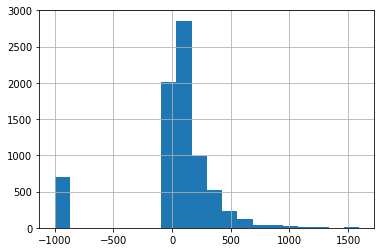

In [32]:
hospitals.POPULATION.hist(bins = 20)

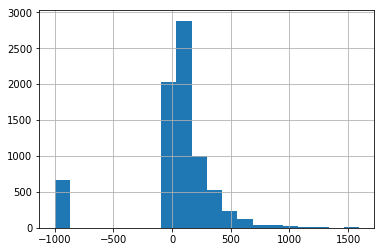

In [66]:
hospitals.BEDS.hist(bins = 20)

In [8]:
hospitals.replace({"NOT AVAILABLE": None, -999: None}, inplace = True)

In [13]:
percent_missing = hospitals.isna().sum() / hospitals.shape[0]
missing_value_df = pd.DataFrame({'column_name': hospitals.columns,
                                 'missing_rate': percent_missing})

In [18]:
hospitals.ZIP.value_counts().value_counts()

1     4367
2      848
3      251
4       90
5       37
6       16
7        5
9        4
8        4
11       1
10       1
Name: ZIP, dtype: int64

In [14]:
missing_value_df

,column_name,missing_rate
X,X,0.000000
Y,Y,0.000000
OBJECTID,OBJECTID,0.000000
ID,ID,0.000000
NAME,NAME,0.000000
ADDRESS,ADDRESS,0.000000
CITY,CITY,0.000000
STATE,STATE,0.000000
ZIP,ZIP,0.000000
ZIP4,ZIP4,0.985490


In [25]:
hospitals[hospitals.STATUS == "CLOSED"].OWNER

0                           PROPRIETARY
12                          PROPRIETARY
18                                 None
19      GOVERNMENT - DISTRICT/AUTHORITY
27                   GOVERNMENT - STATE
28                          PROPRIETARY
49                                 None
59                                 None
62      GOVERNMENT - DISTRICT/AUTHORITY
86                           NON-PROFIT
89                           NON-PROFIT
102                          NON-PROFIT
104                          NON-PROFIT
106                          NON-PROFIT
117                          NON-PROFIT
158                  GOVERNMENT - STATE
184                          NON-PROFIT
194                          NON-PROFIT
196                  GOVERNMENT - STATE
233                         PROPRIETARY
236                          NON-PROFIT
237                          NON-PROFIT
238                          NON-PROFIT
271                          NON-PROFIT
397                         PROPRIETARY


In [ ]:
31.214600	-85.361603

In [33]:
hospitals[hospitals.ZIP == 36301]

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
914,-85.363631,31.216304,915,11036301,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,None,...,2014-02-10T00:00:00.000Z,http://www.samc.org,H3502,None,1,GOVERNMENT - DISTRICT/AUTHORITY,None,420,LEVEL II,Y
2863,-85.384601,31.203816,1283,4236301,LAUREL OAKS BEHAVIORAL HEALTH CENTER,700 EAST COTTONWOOD ROAD,DOTHAN,AL,36301,None,...,2014-02-10T00:00:00.000Z,http://www.laureloaksbhc.com,H3505,None,1,PROPRIETARY,None,38,None,N
7462,-85.365813,31.217912,5882,2236301,HEALTHSOUTH REHABILITATION HOSPITAL,1736 EAST MAIN STREET,DOTHAN,AL,36301,None,...,2014-03-12T00:00:00.000Z,http://www.healthsouthdothan.com,H3504,None,1,PROPRIETARY,None,51,None,Y
